## Data Augmentation

Bara here
- i would like to not change the speed of the audio because the speed at which people talk can change depending on the accent and i don't think we should be chnaging smething that can be a learnable parameter for the NN
- for pitch i think that too is a accent dependent parameter. tho idk

- i think adding noise is both good and realistic for generalization purposes
- i also think we should do the silence deletion


In [ ]:
#load data
import convenience
df_train_val, sample_rates = convenience.load_train()
df_train_val['augmented_data'] = df_train_val.audio
df_train_val.head()

,file_name,stratify,accent,gender,audio,length,augmented_data
0,1f_1018.wav,1f,1,f,"[tensor(-0.0002), tensor(-6.1035e-05), tensor(...",3.413312,"[tensor(-0.0002), tensor(-6.1035e-05), tensor(..."
1,1f_1026.wav,1f,1,f,"[tensor(-0.0008), tensor(-0.0008), tensor(-0.0...",5.632000,"[tensor(-0.0008), tensor(-0.0008), tensor(-0.0..."
2,1f_1031.wav,1f,1,f,"[tensor(-0.0002), tensor(-0.0002), tensor(-0.0...",4.693313,"[tensor(-0.0002), tensor(-0.0002), tensor(-0.0..."
3,1f_1070.wav,1f,1,f,"[tensor(0.0022), tensor(0.0019), tensor(0.0018...",3.925312,"[tensor(0.0022), tensor(0.0019), tensor(0.0018..."
4,1f_1075.wav,1f,1,f,"[tensor(0.), tensor(3.0518e-05), tensor(0.), t...",2.737500,"[tensor(0.), tensor(3.0518e-05), tensor(0.), t..."


In [2]:
sr = list(sample_rates)[0]
sr

#initialize sr variable (sampling rate) 

16000

In [3]:
import torch
import pandas as pd

In [4]:
waveform = df_train_val.audio[0]
print(waveform)
waveform.shape

tensor([-2.1362e-04, -6.1035e-05, -3.0518e-05,  ...,  6.4087e-04,
         7.3242e-04,  5.7983e-04])


torch.Size([54613])

#### Librosa

In this part I apply different types of augmentation techniques. They're programmed in a pipeline, where the output of the previous is the input to the next one. 
If you want to apply the augmentation technique to a 'clean slate', apply it to df_train_val['augmented'].

Code is adapted from: https://www.kaggle.com/code/huseinzol05/sound-augmentation-librosa#apply-hpss 

(Please note it would be a good idea to see for which augmentations the model has the best performance, yet also a good generalizability!)

In [5]:
import numpy as np
import librosa 

import seaborn as sns 
sns.set() #iirc mostly for visuals 
import tensorflow as tf
from IPython.display import Audio

In [72]:
#pitch shifted audio
#This is the begining of the pipeline, so df_train_val is used. 
# pitch_shift_audio = [] #I always create a seperate list to avoid overwriting the original variable
import soundfile
all_augmented_audio = []
uuid = 0
for i in range(2):
    for file, file_name in zip(df_train_val['augmented_data'],df_train_val["file_name"]):
        file_name = file_name.replace(".wav", "")
        audio = file.numpy() #data has to be a numpy array for Librosa to work
        bins_per_octave = 12 
        pitch_pm = 2 
        pitch_change =  pitch_pm * 2*(np.random.randn())  #every audiofile has a random pitch change (can be tweaked)
        audio_pitch_shift = librosa.effects.pitch_shift(audio, sr = 16000, n_steps=pitch_change, bins_per_octave=bins_per_octave)
        noise_amp = 0.005*np.random.randn()*np.amax(audio_pitch_shift) #random audio noise, can be changed to any distribution from https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html
        audio_noise_shift = audio_pitch_shift + noise_amp * np.random.normal(size= audio_pitch_shift.shape[0]) #mathy math for noise
        # all_augmented_audio.append(audio_noise_shift)
        soundfile.write(f"augmented/{file_name}_{uuid}.wav", audio_noise_shift, 16000)
        uuid += 1
        # display(Audio(audio_noise_shift, rate=16000))
        # pd.Series(audio_noise_shift).plot()
        # break
        # pitch_shift_audio.append() 

# print(pitch_shift_audio)

In [ ]:
#distribution noise
# noise_dist_audio = []

# for file in pitch_shift_audio:
#     audio_noise = file
#     noise_amp = 0.005*np.random.randn()*np.amax(audio_noise) #random audio noise, can be changed to any distribution from https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html
#     audio_noise = audio_noise + noise_amp * np.random.normal(size= audio_noise.shape[0]) #mathy math for noise
    
#     noise_dist_audio.append(audio_noise) 
#     all_augmented_audio.append(audio_noise)

Axes(0.125,0.11;0.775x0.77)


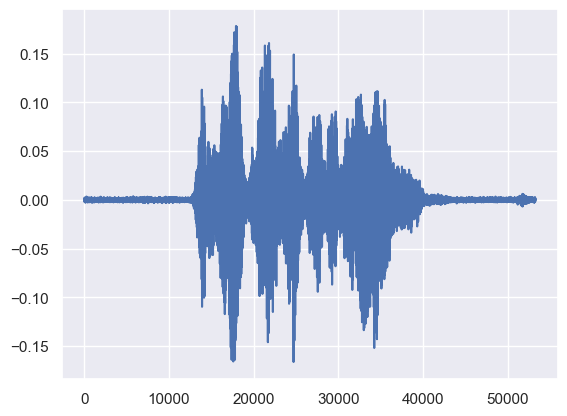

In [ ]:
#seeing how the audio looks like
#sanity check to see if the trimming works
# print(pd.Series(noise_dist_audio[100]).plot())

In [35]:
#supposed to convert the augmented data back into the df, in tensor form, but I was unable to make it work, kept giving dimension errors
#there could be a hidden issue in the functions used where it changes the dimensions, I suspect speed or stretch 
#I would try to run all parts of the pipeline seperately and see from where the issue arrises 

##Bara here! I think the issue is because you're converting a list on np arrays, which i dont think the .tensor hnows how to handle?

#augmented_data = torch.tensor(trimmed_audio)

#df_train_val['augmented_data'] = augmented_data
#df_train_val.head()